<a href="https://colab.research.google.com/github/hackathonjm/AI_fraud_detection/blob/main/AIFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib

# Enable plots in Jupyter
%matplotlib inline


In [7]:
file1 = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
file2 = pd.read_csv("Auto_Insurance_Fraud_Claims_File02.csv")
test_data = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")
submission_template = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")


In [8]:
train_data = pd.concat([file1, file2], ignore_index=True)


In [9]:
drop_cols = ['Claim_ID', 'Check_Point', 'Vehicle_Registration', 'DL_Expiry_Date',
             'Policy_Start_Date', 'Policy_Expiry_Date', 'Accident_Date', 'Claims_Date', 'Bind_Date1']
train_data.drop(columns=drop_cols, inplace=True)
test_ids = test_data['Claim_ID']
test_data.drop(columns=drop_cols, inplace=True)


In [17]:
# Step 6: Find and Handle Missing Values
print("Missing values before filling:")
print(combined.isnull().sum())
combined.fillna('Missing', inplace=True)
print("\nMissing values after filling:")
print(combined.isnull().sum())



Missing values before filling:
Customer_Life_Value1        0
Age_Insured                 0
Policy_Num                  0
Policy_State                0
Policy_BI                   0
Policy_Ded                  0
Policy_Premium              0
Umbrella_Limit              0
Insured_Zip                 0
Gender                      0
Education                   0
Occupation                  0
Hobbies                     0
Insured_Relationship        0
Capital_Gains               0
Capital_Loss                0
Garage_Location             0
Accident_Type               0
Collision_Type              0
Accident_Severity           0
authorities_contacted       0
Acccident_State             0
Acccident_City              0
Accident_Location           0
Accident_Hour               0
Num_of_Vehicles_Involved    0
Property_Damage             0
Bodily_Injuries             0
Witnesses                   0
Police_Report               0
Auto_Make                   0
Auto_Model                  0
Auto_Year

In [12]:
# Step 7: Label Encoding for Categorical Features
cat_cols = combined.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    combined[col] = le.fit_transform(combined[col].astype(str))


In [13]:
# Step 8: Split Data Back
X_train = combined.iloc[:len(train_data), :]
X_test = combined.iloc[len(train_data):, :]
y_train = train_data['Fraud_Ind'].map({'Y': 1, 'N': 0})


In [31]:
# Step 9: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split scaled training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models={
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42),
    "Support Vector Machine": SVC(probability=True, C=1.0, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, alpha=0.01, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1)
}

In [33]:
results = []

print("\n--- Training and Evaluating Models on Validation Set ---")

for name, model in models.items():

    # Train the model on the scaled training data

    model.fit(X_train_scaled, y_train)



    # Make predictions on the unseen validation data

    y_pred = model.predict(X_val_scaled)

    y_proba = model.predict_proba(X_val_scaled)[:,1]



    # Calculate metrics

    acc = accuracy_score(y_val, y_pred)

    roc = roc_auc_score(y_val, y_proba)

    results.append((name, acc, roc))



    # Print results

    print(f"\n--- {name} ---")

    print(f"Validation Accuracy: {acc:.4f}")

    print(f"Validation ROC AUC: {roc:.4f}")

    print("Classification Report:\n", classification_report(y_val, y_pred))


--- Training and Evaluating Models on Validation Set ---

--- Logistic Regression ---
Validation Accuracy: 0.7998
Validation ROC AUC: 0.7984
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      8960
           1       0.66      0.43      0.52      3040

    accuracy                           0.80     12000
   macro avg       0.74      0.68      0.70     12000
weighted avg       0.79      0.80      0.78     12000


--- Random Forest ---
Validation Accuracy: 1.0000
Validation ROC AUC: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8960
           1       1.00      1.00      1.00      3040

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


--- Gradient Boosting ---
Validation Accuracy: 1.0000
Validation ROC AUC: 1.0

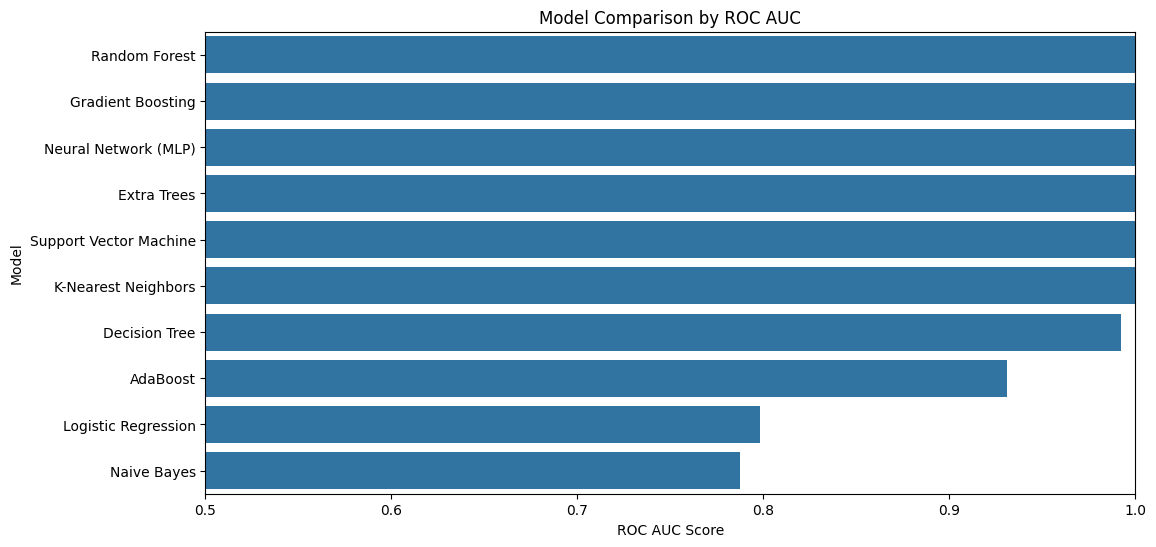

In [34]:
# Step 11: Visualize Model Comparison
result_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
plt.figure(figsize=(12,6))
sns.barplot(x="ROC AUC", y="Model", data=result_df.sort_values(by="ROC AUC", ascending=False))
plt.title("Model Comparison by ROC AUC")
plt.xlabel("ROC AUC Score")
plt.ylabel("Model")
plt.xlim(0.5, 1.0)
plt.show()


In [35]:
# Step 12: Select Best Model for Final Prediction (Random Forest)
best_model = models["Random Forest"]
test_predictions = best_model.predict(X_test_scaled)


In [36]:
# Step 13: Prepare Submission
submission_template['Fraud_Ind'] = test_predictions
submission_template['Fraud_Ind'] = submission_template['Fraud_Ind'].map({1: 'Y', 0: 'N'})
submission_template.to_csv("Fraud_Detection_Submission.csv", index=False)


In [37]:
# Step 14: Save Model and Scaler
joblib.dump(best_model, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']